In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'C:\Users\Iremide\Desktop\titles.csv')
df2 = pd.read_csv(r'C:\Users\Iremide\Desktop\credits.csv')

In [3]:
movies = df.merge(df2, left_on='id', right_on='id', how='left')
movies.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,character,role
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN,NaN,NaN,NaN,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2,3748.0,Robert De Niro,Travis Bickle,ACTOR
2,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2,14658.0,Jodie Foster,Iris Steensma,ACTOR
3,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2,7064.0,Albert Brooks,Tom,ACTOR
4,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2,3739.0,Harvey Keitel,Matthew 'Sport' Higgins,ACTOR


In [4]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77585 entries, 0 to 77584
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    77585 non-null  object 
 1   title                 77584 non-null  object 
 2   type                  77585 non-null  object 
 3   description           77524 non-null  object 
 4   release_year          77585 non-null  int64  
 5   age_certification     46840 non-null  object 
 6   runtime               77585 non-null  int64  
 7   genres                77585 non-null  object 
 8   production_countries  77585 non-null  object 
 9   seasons               14247 non-null  float64
 10  imdb_id               73726 non-null  object 
 11  imdb_score            73257 non-null  float64
 12  imdb_votes            73168 non-null  float64
 13  tmdb_popularity       77482 non-null  float64
 14  tmdb_score            76322 non-null  float64
 15  person_id          

In [5]:
movies.isnull().sum()

id                          0
title                       1
type                        0
description                61
release_year                0
age_certification       30745
runtime                     0
genres                      0
production_countries        0
seasons                 63338
imdb_id                  3859
imdb_score               4328
imdb_votes               4417
tmdb_popularity           103
tmdb_score               1263
person_id                 372
name                      372
character                9999
role                      372
dtype: int64

In [6]:
movies['idInt'] = movies['id'].str.replace('\D+','').astype(int)

In [7]:
movies.dropna(subset = ['title', 'description', 'imdb_id', 'name'] , inplace= True)

In [8]:
movies.drop(['character', 'imdb_id', 'id'], axis =1, inplace = True)

In [9]:
movies['seasons'].fillna(0, inplace= True)
movies['age_certification'].fillna('TV_PG', inplace = True)
movies.fillna(method= "bfill", inplace = True)
movies['tmdb_score'].fillna(movies['tmdb_score'].mean(), inplace= True)
movies.isnull().sum()

title                   0
type                    0
description             0
release_year            0
age_certification       0
runtime                 0
genres                  0
production_countries    0
seasons                 0
imdb_score              0
imdb_votes              0
tmdb_popularity         0
tmdb_score              0
person_id               0
name                    0
role                    0
idInt                   0
dtype: int64

In [10]:
movies['genres'] = movies['genres'].str.strip('[]').str.replace(' ','').str.replace("'",'')
movies['genres'] = movies['genres'].str.split(',')

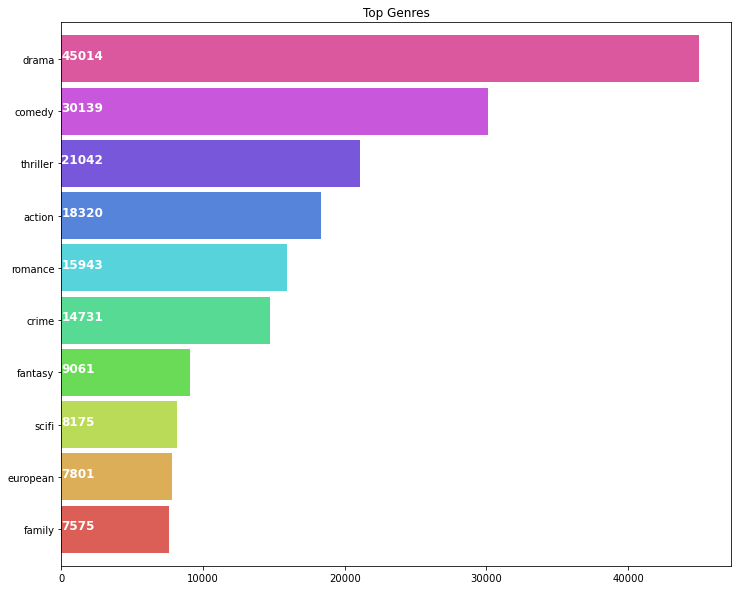

In [11]:
plt.subplots(figsize=(12,10))
list1 = []
for i in movies['genres']:
    list1.extend(i)
ax = pd.Series(list1).value_counts()[:10].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('hls',10))
for i, v in enumerate(pd.Series(list1).value_counts()[:10].sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=12,color='white',weight='bold')
plt.title('Top Genres')
plt.show()


In [12]:
genreList = []
for index, row in movies.iterrows():
    genres = row["genres"]
    
    for genre in genres:
        if genre not in genreList:
            genreList.append(genre)
genreList[:] #now we have a list with unique genres

['crime',
 'drama',
 'comedy',
 'fantasy',
 'horror',
 'european',
 'thriller',
 'action',
 'music',
 'romance',
 'family',
 'western',
 'war',
 'animation',
 'documentation',
 'history',
 'scifi',
 'reality',
 'sport',
 '']

In [13]:
def binary(genre_list):
    binaryList = []
    
    for genre in genreList:
        if genre in genre_list:
            binaryList.append(1)
        else:
            binaryList.append(0)
    
    return binaryList

In [14]:
movies['genres_bin'] = movies['genres'].apply(lambda x: binary(x))
movies['genres_bin'].head()

1    [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
2    [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
3    [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
4    [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
5    [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: genres_bin, dtype: object

In [15]:
movies['actor_bin'] = movies['name'].apply(lambda x: binary(x))
movies['actor_bin'].head()

1    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
2    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
3    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
4    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
5    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: actor_bin, dtype: object

In [16]:
movies.columns

Index(['title', 'type', 'description', 'release_year', 'age_certification',
       'runtime', 'genres', 'production_countries', 'seasons', 'imdb_score',
       'imdb_votes', 'tmdb_popularity', 'tmdb_score', 'person_id', 'name',
       'role', 'idInt', 'genres_bin', 'actor_bin'],
      dtype='object')

In [17]:
from scipy import spatial
def Similarity(movieId1, movieId2):
    a = movies.iloc[movieId1]
    b = movies.iloc[movieId2]


    #data_neighbours[product].iloc[1:10
    
    genresA = a['genres_bin']
    genresB = b['genres_bin']
    
    genreDistance = spatial.distance.cosine(genresA, genresB)
    
    scoreA = a['actor_bin']
    scoreB = b['actor_bin']
    scoreDistance = spatial.distance.cosine(scoreA, scoreB)
    
    return genreDistance + scoreDistance 

In [18]:
Similarity(3,160)

0.5917517095361369

In [19]:
print(movies.iloc[3])
print(movies.iloc[160])

title                                                         Taxi Driver
type                                                                MOVIE
description             A mentally unstable Vietnam War veteran works ...
release_year                                                         1976
age_certification                                                       R
runtime                                                               113
genres                                                     [crime, drama]
production_countries                                               ['US']
seasons                                                               0.0
imdb_score                                                            8.3
imdb_votes                                                       795222.0
tmdb_popularity                                                    27.612
tmdb_score                                                            8.2
person_id                             

In [20]:
movies.insert(0, 'new_id', range(len(movies)))

In [41]:
import operator
def predict_score():
    name = input('Enter a movie title: ')
    new_movie = movies[movies['title'].str.contains(name)].iloc[0].to_frame().T
    print('Selected Movie: ',new_movie.title.values[0])
    def getNeighbors(baseMovie, K):
        distances = []
    
        for index, movie in movies.iterrows():
            if movie['new_id'] != baseMovie['new_id'].values[0]:
                dist = Similarity(baseMovie['new_id'].values[0], movie['new_id'])
                distances.append((movie['new_id'], dist))
    
        distances.sort(key=operator.itemgetter(1))
        neighbors = []
    
        for x in range(K):
            neighbors.append(distances[x])
        return neighbors
    
    K = 50
    avgRating = 0
    neighbors = getNeighbors(new_movie, K)
    print('\nRecommended Movies: \n')
    for neighbor in neighbors:
        if str(movies.iloc[neighbor[0]][1]) != new_movie.title.values[0]:
            print(str( movies.iloc[neighbor[0]][0])+" | Title: "+str(movies.iloc[neighbor[0]][1])+" | Genres: "+str(movies.iloc[neighbor[0]][7]).strip('[]').replace(' ','')+" | Rating: "+str(movies.iloc[neighbor[0]][10]))
    print('\n')
    #avgRating = int(avgRating)/K
    #print('The predicted rating for %s is: %f' %(new_movie['title'].values[0],avgRating))
    #print('The actual rating for %s is %f' %(new_movie['title'].values[0],new_movie['vote_average']))


In [42]:
predict_score()

Selected Movie:  Taxi Driver

Recommended Movies: 

605 | Title: The Return of the Prodigal Son | Genres: 'drama','crime' | Rating: 7.2
606 | Title: The Return of the Prodigal Son | Genres: 'drama','crime' | Rating: 7.2
607 | Title: The Return of the Prodigal Son | Genres: 'drama','crime' | Rating: 7.2
608 | Title: The Return of the Prodigal Son | Genres: 'drama','crime' | Rating: 7.2
609 | Title: The Return of the Prodigal Son | Genres: 'drama','crime' | Rating: 7.2
610 | Title: The Return of the Prodigal Son | Genres: 'drama','crime' | Rating: 7.2
611 | Title: The Return of the Prodigal Son | Genres: 'drama','crime' | Rating: 7.2
612 | Title: The Return of the Prodigal Son | Genres: 'drama','crime' | Rating: 7.2
613 | Title: The Return of the Prodigal Son | Genres: 'drama','crime' | Rating: 7.2
614 | Title: The Return of the Prodigal Son | Genres: 'drama','crime' | Rating: 7.2
615 | Title: The Return of the Prodigal Son | Genres: 'drama','crime' | Rating: 7.2
616 | Title: The Return 